In [1]:
import queueing_process as qp
import matplotlib.pyplot as plt
import numpy as np

# Placeholder delay distributions

In [2]:
def symptom_onset_to_joining_queue():
    return 2

In [3]:
def test_processing_delay_dist():
    return 1

# Model set up

In [36]:
days_to_simulate = 75
demand = [int(round(100*np.exp(0.05 * time))) for time in range(days_to_simulate)] 
capacity = [50 + time * 10 for time in range(days_to_simulate)]

In [37]:
my_queue = qp.queueing_process(
    days_to_simulate = days_to_simulate,
    capacity = capacity,
    demand = demand,
    symptom_onset_to_joining_queue_dist = symptom_onset_to_joining_queue,
    test_processing_delay_dist = test_processing_delay_dist
)

In [38]:
my_queue.run_simulation()

In [39]:
my_queue.queue_info

,time,new_applicants,capacity,spillover_to_next_day,total_applications_today,capacity_exceeded,capacity_exceeded_by,number_swabbed_today,number_left_queue_not_tested
0,0,100,5,0,100,True,95,5,0
1,1,105,12,95,200,True,188,12,0
2,2,111,19,188,299,True,280,19,0
3,3,116,26,280,396,True,370,26,0
4,4,122,33,370,492,True,459,33,0
...,...,...,...,...,...,...,...,...,...
70,70,3312,495,12773,13979,True,13484,495,2106
71,71,3481,502,13484,14711,True,14209,502,2254
72,72,3660,509,14209,15510,True,15001,509,2359
73,73,3847,516,15001,16345,True,15829,516,2503


Text(0.5, 1.0, 'Queueing process summary statistics')

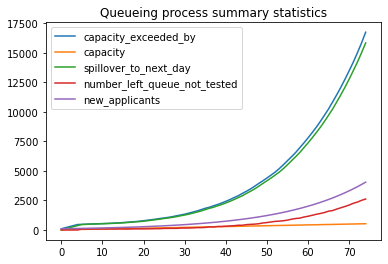

In [40]:
plt.plot('time','capacity_exceeded_by', data = my_queue.queue_info)
plt.plot('time','capacity', data = my_queue.queue_info)
plt.plot('time','spillover_to_next_day', data = my_queue.queue_info)
plt.plot('time','number_left_queue_not_tested', data = my_queue.queue_info)
plt.plot('time','new_applicants', data = my_queue.queue_info)
plt.legend()
plt.title('Queueing process summary statistics')

Text(0.5, 1.0, 'Symptom onset to receiving result distribution on day 60')

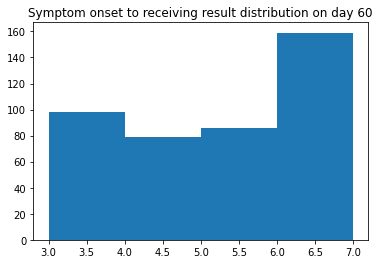

In [41]:
time = 60

delays = my_queue.get_delays_for(time_entered_queue = time,
                                 delay_from_column = 'symptom_onset',
                                 delay_to_column = 'time_received_result')

bin_count = delays.max() - delays.min()

delays.hist(bins = bin_count, grid = False)
plt.title(f'Symptom onset to receiving result distribution on day {time}')